# Importing libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import nltk
nltk.download('punkt')  # Downloading Punkt Tokenizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Function for plotting

In [ ]:
import matplotlib.pyplot as plt

def my_plot(his):
  f1_score_y_axis = his.history['accuracy']
  val_f1_score_y_axis = his.history['val_accuracy']

  loss_y_axis = his.history['loss']
  val_loss_y_axis = his.history['val_loss']

  epochs = range(1, len(f1_score_y_axis) + 1)

  plt.plot(epochs, f1_score_y_axis, label='accuracy')
  plt.plot(epochs, val_f1_score_y_axis, label='val_accuracy')
  plt.title('Training and Validation Accuracy v/s Epochs')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss_y_axis, label ='loss')
  plt.plot(epochs, val_loss_y_axis, label='val_loss')
  plt.title('Training and Validaiton Loss v/s Epochs')
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.show()

# Loading data

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Sentiment Analysis/Code 3/Dataset/train.tsv', sep='\t')
dataset = pd.DataFrame(dataset, columns=['Phrase', 'Sentiment'])

In [ ]:
print(dataset)

                                                   Phrase  Sentiment
0       A series of escapades demonstrating the adage ...          1
1       A series of escapades demonstrating the adage ...          2
2                                                A series          2
3                                                       A          2
4                                                  series          2
...                                                   ...        ...
156055                                          Hearst 's          2
156056                          forced avuncular chortles          1
156057                                 avuncular chortles          3
156058                                          avuncular          2
156059                                           chortles          2

[156060 rows x 2 columns]


# Removing contractions

In [ ]:
!pip install contractions
import contractions

     |████████████████████████████████| 327kB 27.2MB/s 
     |████████████████████████████████| 266kB 20.7MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.1-cp36-cp36m-linux_x86_64.whl size=84335 sha256=cd6a4fac25eaaf62e275b470279b08f9bab56daff692c06422cd6dfefbd1144b
  Stored in directory: /root/.cache/pip/wheels/e4/ab/f7/cb39270df8f6126f3dd4c33d302357167086db460968cfc80c
Successfully built pyahocorasick


In [ ]:
for i in range(len(dataset)):
  dataset.iloc[i, 0] = contractions.fix(dataset.iloc[i, 0])

In [ ]:
print(dataset.iloc[0, 0])

A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .


In [ ]:
print(dataset)

                                                   Phrase  Sentiment
0       A series of escapades demonstrating the adage ...          1
1       A series of escapades demonstrating the adage ...          2
2                                                A series          2
3                                                       A          2
4                                                  series          2
...                                                   ...        ...
156055                                          Hearst 's          2
156056                          forced avuncular chortles          1
156057                                 avuncular chortles          3
156058                                          avuncular          2
156059                                           chortles          2

[156060 rows x 2 columns]


# Removing commas, fullstops, @ and apostrophe

In [ ]:
for i in range(len(dataset)):

  # Commas and fullstop
  temp = ""
  for j in range(len(dataset.iloc[i, 0])):
    if dataset.iloc[i, 0][j] != ',' and dataset.iloc[i, 0][j] != '.' and dataset.iloc[i, 0][j] != '@':
      temp += dataset.iloc[i, 0][j]
    else:
      # If the comma is in a number, just ignore that comma
      if dataset.iloc[i, 0][j] == ',' and j!=0 and dataset.iloc[i, 0][j-1] in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']:
        temp += ""
      elif dataset.iloc[i, 0][j] == '.' and j!=0 and dataset.iloc[i, 0][j-1] in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']:
        temp += "."
      elif dataset.iloc[i, 0][j] == '.' and j!=len(dataset.iloc[i, 0])-1 and dataset.iloc[i, 0][j+1] in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']:
        temp += "."
      else:
        temp += " "

  dataset.iloc[i, 0] = temp

In [ ]:
print(dataset)

                                                   Phrase  Sentiment
0       A series of escapades demonstrating the adage ...          1
1       A series of escapades demonstrating the adage ...          2
2                                                A series          2
3                                                       A          2
4                                                  series          2
...                                                   ...        ...
156055                                          Hearst 's          2
156056                          forced avuncular chortles          1
156057                                 avuncular chortles          3
156058                                          avuncular          2
156059                                           chortles          2

[156060 rows x 2 columns]


In [ ]:
for i in range(len(dataset)):
  temp = ""
  j = 0
  while j < len(dataset.iloc[i, 0]):
    if dataset.iloc[i, 0][j] == '\'':
      if j != len(dataset.iloc[i, 0]) - 1 and dataset.iloc[i, 0][j+1] == 's':
        j += 1
    elif dataset.iloc[i, 0][j] != '\"':
      temp += dataset.iloc[i, 0][j]
    j += 1
  dataset.iloc[i, 0] = temp

In [ ]:
dataset.to_csv('Filtered.csv')

In [ ]:
print(len(dataset))

156060


In [ ]:
print(dataset.iloc[0, 0])

A series of escapades demonstrating the adage that what is good for the goose is also good for the gander   some of which occasionally amuses but none of which amounts to much of a story  


# Tokenization

In [ ]:
from nltk.tokenize import word_tokenize

for i in range(len(dataset)):
  dataset.at[i, "Phrase"] = word_tokenize(dataset.iloc[i, 0])

In [ ]:
print(dataset)

                                                   Phrase  Sentiment
0       [A, series, of, escapades, demonstrating, the,...          1
1       [A, series, of, escapades, demonstrating, the,...          2
2                                             [A, series]          2
3                                                     [A]          2
4                                                [series]          2
...                                                   ...        ...
156055                                           [Hearst]          2
156056                      [forced, avuncular, chortles]          1
156057                              [avuncular, chortles]          3
156058                                        [avuncular]          2
156059                                         [chortles]          2

[156060 rows x 2 columns]


In [ ]:
print(dataset.iloc[1, 0])

['A', 'series', 'of', 'escapades', 'demonstrating', 'the', 'adage', 'that', 'what', 'is', 'good', 'for', 'the', 'goose']


# Filtering

### Removing Stopwords

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
for i in range(len(dataset)):
  tokenized_words = dataset.iloc[i, 0]
  filtered_sentence = []
  for w in tokenized_words:
    if w not in stop_words:
      filtered_sentence.append(w)
  dataset.at[i, "Phrase"] = filtered_sentence

In [ ]:
print(dataset.iloc[0,0])

['A', 'series', 'escapades', 'demonstrating', 'adage', 'good', 'goose', 'also', 'good', 'gander', 'occasionally', 'amuses', 'none', 'amounts', 'much', 'story']


In [ ]:
print(dataset.iloc[6,0])

[]


In [ ]:
print(len(dataset.iloc[6,0]))

0


# Lexicon Normalization

### Stemming

In [ ]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

for i in range(len(dataset)):
  stemmed_words = []
  for w in dataset.iloc[i, 0]:
    stemmed_words.append(ps.stem(w))
  dataset.at[i, "Phrase"] = stemmed_words

In [ ]:
print(dataset.iloc[0, 0])

['A', 'seri', 'escapad', 'demonstr', 'adag', 'good', 'goos', 'also', 'good', 'gander', 'occasion', 'amus', 'none', 'amount', 'much', 'stori']


In [ ]:
print(dataset)

                                                   Phrase  Sentiment
0       [A, seri, escapad, demonstr, adag, good, goos,...          1
1          [A, seri, escapad, demonstr, adag, good, goos]          2
2                                               [A, seri]          2
3                                                     [A]          2
4                                                  [seri]          2
...                                                   ...        ...
156055                                           [hearst]          2
156056                          [forc, avuncular, chortl]          1
156057                                [avuncular, chortl]          3
156058                                        [avuncular]          2
156059                                           [chortl]          2

[156060 rows x 2 columns]


### Lemmatization

In [ ]:
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer

lem = WordNetLemmatizer()

for i in range(len(dataset)):
  lemmatized_words = []
  for w in dataset.iloc[i, 0]:
    lemmatized_words.append(lem.lemmatize(w))
  dataset.at[i, "Phrase"] = lemmatized_words

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
print(dataset.iloc[0, 0])

['A', 'seri', 'escapad', 'demonstr', 'adag', 'good', 'goo', 'also', 'good', 'gander', 'occasion', 'amus', 'none', 'amount', 'much', 'stori']


In [ ]:
dataset.to_csv('Lemmatized.csv')

# Getting Training and Validation Data

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Sentiment Analysis/Code 3/Dataset/Lemmatized_19020221.csv')
dataset = pd.DataFrame(dataset, columns=['Phrase', 'Sentiment'])

In [ ]:
print(len(dataset.iloc[6, 0]))

0


In [ ]:
print(dataset.iloc[6, 0])

[]


In [ ]:
## Changes done
reviews = []
labels = []

for i in range(len(dataset)):
  if(len(dataset.iloc[i, 0]) != 0):
    reviews.append(dataset.iloc[i, 0])
    if dataset.iloc[i, 1] == 0 or dataset.iloc[i, 1] == 1: # (Negative, Somewhat Negative) = Negative
      labels.append(0)
    elif dataset.iloc[i, 1] == 2: # Neutral
      labels.append(1)
    else: # (Positive, Somewhat Positive) = Positive
      labels.append(2)

In [ ]:
print(reviews)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
print(len(reviews))

155118


In [ ]:
print(labels)

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 2, 2, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 2, 2, 2, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 

In [ ]:
print(len(labels))

155118


In [ ]:
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

review_len = 100   # Choose the first 100 words for each review


tokenizer = Tokenizer(num_words=10000)  # Consider the first 10000 words for forming a record of the words used
tokenizer.fit_on_texts(reviews)  # Creates an internal vocabulary (a dictionary) with each word getting a unique number

sequences = []
for i in range(len(reviews)):
  temp1 = tokenizer.texts_to_sequences(reviews[i])  # Accessing the unique number for each word and replacing text with sequences of those unique numbers
  temp2 = []
  for j in range(len(temp1)):
    if len(temp1[j]) != 0:
      temp2.append(temp1[j][0])
  sequences.append(temp2)

In [ ]:
word_index = tokenizer.word_index
print(len(word_index))

12014


In [ ]:
import numpy as np

review_data = pad_sequences(sequences, maxlen=review_len)  # Transforms the list of sequences into a 2D Numpy array of shape (number_of_samples, review_len)
labels = np.asarray(labels)  # Converts the labels into a Numpy 1D array

print(review_data.shape)
print(labels.shape)

(155118, 100)
(155118,)


In [ ]:
print(review_data)

[[   0    0    0 ...  641   19   10]
 [   0    0    0 ... 5366   15 1808]
 [   0    0    0 ...    0   11  274]
 ...
 [   0    0    0 ...    0 7480 7481]
 [   0    0    0 ...    0    0 7480]
 [   0    0    0 ...    0    0 7481]]


In [ ]:
labels = pd.get_dummies(labels)  # Converting the labels to One-hot encoding using a dummy

In [ ]:
print(labels)

        0  1  2
0       1  0  0
1       0  1  0
2       0  1  0
3       0  1  0
4       0  1  0
...    .. .. ..
155113  0  1  0
155114  1  0  0
155115  0  0  1
155116  0  1  0
155117  0  1  0

[155118 rows x 3 columns]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(review_data, labels, test_size=0.20, random_state=1)  # Splitting the data into training and validation sets

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(124094, 100)
(124094, 3)
(31024, 100)
(31024, 3)


In [ ]:
import pickle

# saving
with open('/content/drive/My Drive/Sentiment Analysis/Code 3/Saved Model/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Using GloVe Word Embeddings

In [ ]:
embeddings_index = {}
f = open('/content/drive/My Drive/Sentiment Analysis/Code 3/glove.6B.100d.txt')

for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

In [ ]:
embedding_matrix = np.zeros((10000, 100))
for word, i in word_index.items():
  if i < 1000:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

In [ ]:
print(embedding_matrix.shape)

(10000, 100)


# Model definition

In [ ]:
from keras.models import Model
from keras.layers import Input, Embedding, SpatialDropout1D, LSTM, Flatten, Dense, BatchNormalization, Activation

# Layer 1 - Input
layer1 = Input(shape = (x_train.shape[1], ))

# Layer 2 - Embedding
layer2 = Embedding(input_dim=10000, output_dim=100, input_length=x_train.shape[1])(layer1)

# Layer 3 - SpatialDropout1D
layer3 = SpatialDropout1D(rate=0.2)(layer2)

# Layer 4 - LSTM
layer4 = LSTM(units=100, dropout=0.2, recurrent_dropout=0.2)(layer3)

# Layer 5 - Flatten
layer5 = Flatten()(layer4)

# Layer 6 - Dense
layer6 = Dense(units=100)(layer5)
layer6 = BatchNormalization()(layer6)
layer6 = Activation('relu')(layer6)

# Layer 7 - Dense
layer7 = Dense(units=3, activation='softmax')(layer6)

In [ ]:
model = Model(inputs=layer1, outputs=layer7)
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 100, 100)          1000000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 100, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
flatten (Flatten)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400   

In [ ]:
model.layers[1].set_weights([embedding_matrix])
model.layers[1].trainable = True

In [ ]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7, verbose=1)  # Callback

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
his = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val), callbacks=[reduce_lr], shuffle=True)

Epoch 1/10
970/970 [==============================] - 363s 370ms/step - loss: 0.9038 - accuracy: 0.5890 - val_loss: 0.7003 - val_accuracy: 0.7039
Epoch 2/10
970/970 [==============================] - 357s 368ms/step - loss: 0.6722 - accuracy: 0.7171 - val_loss: 0.6608 - val_accuracy: 0.7292
Epoch 3/10
970/970 [==============================] - 358s 369ms/step - loss: 0.6170 - accuracy: 0.7424 - val_loss: 0.6502 - val_accuracy: 0.7347
Epoch 4/10
970/970 [==============================] - 357s 368ms/step - loss: 0.5801 - accuracy: 0.7567 - val_loss: 0.6450 - val_accuracy: 0.7346
Epoch 5/10
970/970 [==============================] - 350s 361ms/step - loss: 0.5502 - accuracy: 0.7700 - val_loss: 0.6406 - val_accuracy: 0.7390
Epoch 6/10
970/970 [==============================] - 359s 370ms/step - loss: 0.5302 - accuracy: 0.7771 - val_loss: 0.6467 - val_accuracy: 0.7428
Epoch 7/10
970/970 [==============================] - 371s 382ms/step - loss: 0.5094 - accuracy: 0.7846 - val_loss: 0.6542 -

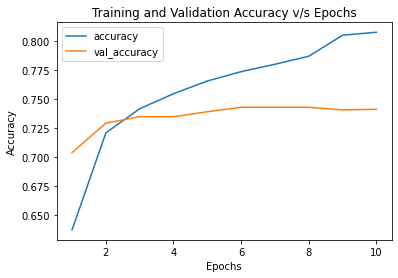

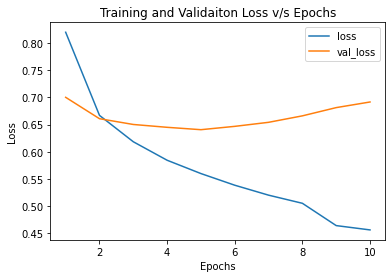

In [ ]:
my_plot(his)

In [ ]:
model.save("/content/drive/My Drive/Sentiment Analysis/Code 3/Saved Model/model1.h5")

# Hyperparameter Tuning - Using Keras Tuner Library

In [ ]:
!pip install -U keras-tuner

     |████████████████████████████████| 71kB 9.8MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp36-none-any.whl size=78939 sha256=322c27a6476a672215968979d460a38dcd50206d934c0d8035cdaf530b9ea828
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15358 sha256=2967941f7521cb73705b6174037d9bdaf0b35c72f9a0a204595645fa2d7a117a
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
from kerastuner import HyperModel
from keras.models import Model
from keras.layers import Input, Embedding, SpatialDropout1D, LSTM, Flatten, Dense, BatchNormalization, Activation
from keras.optimizers import Adam

class MyHyperModel(HyperModel):
  
  def __init__(self, num_classes):
    self.num_classes = num_classes

  def build(self, hp):
    # Layer 1 - Input
    layer1 = Input(shape = (x_train.shape[1], ))

    # Layer 2 - Embedding
    layer2 = Embedding(input_dim=10000, output_dim=100, input_length=x_train.shape[1])(layer1)

    # Layer 3 - SpatialDropout1D
    layer3 = SpatialDropout1D(rate=hp.Float('spatial_dropout_rate', min_value=0.1, max_value=0.4, step=0.05, default=0.2))(layer2)

    # Layer 4 - LSTM
    layer4 = LSTM(units=hp.Int('lstm_units', min_value=80, max_value=120, step=10, default=100), 
                  dropout=hp.Float('lstm_dropout', min_value=0.1, max_value=0.4, step=0.05, default=0.2), 
                  recurrent_dropout=hp.Float('lstm_recurrent_dropout', min_value=0.1, max_value=0.4, step=0.05, default=0.2))(layer3)

    # Layer 5 - Flatten
    layer5 = Flatten()(layer4)

    # Layer 6 - Dense
    layer6 = Dense(units=hp.Int('dense_units', min_value=80, max_value=120, step=10, default=100))(layer5)
    layer6 = BatchNormalization()(layer6)
    layer6 = Activation('relu')(layer6)

    # Layer 7 - Dense
    layer7 = Dense(units=3, activation='softmax')(layer6)

    # Forming the model
    model = Model(inputs=layer1, outputs=layer7)
    print(model.summary())

    # Enabling the GloVe weights to be trained according to our training data
    model.layers[1].set_weights([embedding_matrix])
    model.layers[1].trainable = True

    # Compiling the model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('adam_learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [ ]:
from kerastuner.tuners import RandomSearch

hypermodel = MyHyperModel(num_classes=3)

tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='/content/drive/My Drive/Sentiment Analysis/Code 3/Tuned Models',
    project_name='Tuned Models'
)

INFO:tensorflow:Reloading Oracle from existing project /content/drive/My Drive/Sentiment Analysis/Code 3/Tuned Models/Tuned Models/oracle.json
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 100, 100)          1000000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 100, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
flatten (Flatten)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 100)          

In [ ]:
tuner.search(x_train, y_train, epochs=6, batch_size=128, validation_data=(x_val, y_val), verbose=1)

Trial 3 Complete [00h 34m 30s]
val_accuracy: 0.7371067404747009

Best val_accuracy So Far: 0.7371067404747009
Total elapsed time: 01h 45m 08s
INFO:tensorflow:Oracle triggered exit


In [ ]:
# Printing a summary of the results
tuner.results_summary()

Results summary
Results in /content/drive/My Drive/Sentiment Analysis/Code 3/Tuned Models/Tuned Models
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
spatial_dropout_rate: 0.15000000000000002
lstm_units: 80
lstm_dropout: 0.40000000000000013
lstm_recurrent_dropout: 0.40000000000000013
dense_units: 110
adam_learning_rate: 0.01
Score: 0.7371067404747009
Trial summary
Hyperparameters:
spatial_dropout_rate: 0.25000000000000006
lstm_units: 110
lstm_dropout: 0.15000000000000002
lstm_recurrent_dropout: 0.20000000000000004
dense_units: 90
adam_learning_rate: 0.01
Score: 0.7370100617408752
Trial summary
Hyperparameters:
spatial_dropout_rate: 0.30000000000000004
lstm_units: 110
lstm_dropout: 0.3500000000000001
lstm_recurrent_dropout: 0.30000000000000004
dense_units: 100
adam_learning_rate: 0.01
Score: 0.734463632106781
Trial summary
Hyperparameters:
spatial_dropout_rate: 0.25000000000000006
lstm_units: 90
lstm_dropout: 0.25000000000000006
lst

In [ ]:
model = tuner.get_best_models(num_models=1)[0]

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 100, 100)          1000000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 100, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 80)                57920     
_________________________________________________________________
flatten (Flatten)            (None, 80)                0         
_________________________________________________________________
dense (Dense)                (None, 110)               8910      
_________________________________________________________________
batch_normalization (BatchNo (None, 110)               440   

In [ ]:
model.save("/content/drive/My Drive/Sentiment Analysis/Code 3/Saved Model/model1_tuned.h5")

The original model performs better. We are using that model for further work.

# Fine-Tuning layers

In [ ]:
import keras
from keras.models import load_model
model = load_model("/content/drive/My Drive/Sentiment Analysis/Code 3/Saved Model/model1.h5")

### Freezing all layers except the last Dense layer

In [ ]:
set_trainable = False
for layer in model.layers:
  if layer.name == 'dense_1':
    set_trainable = True

  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [ ]:
for layer in model.layers:
  if layer.trainable == True:
    print(layer.name + " --> True")
  else:
    print(layer.name + " --> False")

input_1 --> False
embedding --> False
spatial_dropout1d --> False
lstm --> False
flatten --> False
dense --> False
batch_normalization --> False
activation --> False
dense_1 --> True


In [ ]:
his = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_val, y_val), callbacks=[reduce_lr], shuffle=True)

Epoch 1/5
970/970 [==============================] - 353s 362ms/step - loss: 0.4505 - accuracy: 0.8100 - val_loss: 0.6990 - val_accuracy: 0.7409
Epoch 2/5
970/970 [==============================] - 346s 357ms/step - loss: 0.4467 - accuracy: 0.8107 - val_loss: 0.7083 - val_accuracy: 0.7404
Epoch 3/5
970/970 [==============================] - 343s 353ms/step - loss: 0.4435 - accuracy: 0.8139 - val_loss: 0.7131 - val_accuracy: 0.7405
Epoch 4/5
970/970 [==============================] - 341s 352ms/step - loss: 0.4395 - accuracy: 0.8136 - val_loss: 0.7143 - val_accuracy: 0.7389

Epoch 00004: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Epoch 5/5
970/970 [==============================] - 329s 339ms/step - loss: 0.4300 - accuracy: 0.8178 - val_loss: 0.7207 - val_accuracy: 0.7408


### Freezing all layers except the last two Dense layers

In [ ]:
set_trainable = False
for layer in model.layers:
  if layer.name == 'dense':
    set_trainable = True

  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [ ]:
for layer in model.layers:
  if layer.trainable == True:
    print(layer.name + " --> True")
  else:
    print(layer.name + " --> False")

input_1 --> False
embedding --> False
spatial_dropout1d --> False
lstm --> False
flatten --> False
dense --> True
batch_normalization --> True
activation --> True
dense_1 --> True


In [ ]:
his = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_val, y_val), callbacks=[reduce_lr], shuffle=True)

Epoch 1/5
970/970 [==============================] - 330s 340ms/step - loss: 0.4273 - accuracy: 0.8188 - val_loss: 0.7263 - val_accuracy: 0.7401
Epoch 2/5
970/970 [==============================] - 329s 339ms/step - loss: 0.4277 - accuracy: 0.8180 - val_loss: 0.7272 - val_accuracy: 0.7404
Epoch 3/5
970/970 [==============================] - 330s 340ms/step - loss: 0.4266 - accuracy: 0.8188 - val_loss: 0.7302 - val_accuracy: 0.7397
Epoch 4/5
970/970 [==============================] - 325s 335ms/step - loss: 0.4255 - accuracy: 0.8198 - val_loss: 0.7306 - val_accuracy: 0.7396

Epoch 00004: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Epoch 5/5
970/970 [==============================] - 325s 335ms/step - loss: 0.4238 - accuracy: 0.8194 - val_loss: 0.7314 - val_accuracy: 0.7399


Fine tuning did not prove to be benefecial. So, we use the tuned model for testing our model.

# Testing

In [ ]:
import keras
from keras.models import load_model
model1 = load_model("/content/drive/My Drive/Sentiment Analysis/Code 3/Saved Model/model1.h5")

In [ ]:
import nltk
nltk.download('punkt')
!pip install contractions
import contractions
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.stem import PorterStemmer
ps = PorterStemmer()
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pickle

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
with open('/content/drive/My Drive/Sentiment Analysis/Code 3/Saved Model/tokenizer.pickle', 'rb') as handle:
  tokenizer = pickle.load(handle)
review_len = 100

In [ ]:
def predict_sentiment(test_text):
  # Removing contractions
  test_text_without_contractions = contractions.fix(test_text)

  # Removing commas, fullstops, @ and apostrophe
  test_text_filtered = ""
  txt = test_text_without_contractions
  for i in range(len(test_text_without_contractions)):
    if txt[i] != ',' and txt[i] != '.' and txt[i] != '@':
      test_text_filtered += txt[i]
    else:
      if txt[i] == ',' and i!=0 and txt[i-1] in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']:
        test_text_filtered += ""
      elif txt[i] == '.' and i!=0 and txt[i-1] in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']:
        test_text_filtered += "."
      elif txt[i] == '.' and i!=len(txt)-1 and txt[i-1] in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']:
        test_text_filtered += "."
      else:
        test_text_filtered += " "

  temp = ""
  i = 0
  txt = test_text_filtered
  while i < len(txt):
    if txt[i] == '\'':
      if i != len(txt) - 1 and txt[i+1] == 's':
        i += 1
    elif txt[i] != '\"':
      temp += txt[i]
    i += 1
  test_text_filtered = temp

  # Tokenization
  test_text_tokenized = word_tokenize(test_text_filtered)

  # Filtering
  filtered_sentence = []
  for w in test_text_tokenized:
    if w not in stop_words:
      filtered_sentence.append(w)

  # Stemming
  stemmed_words = []
  for w in filtered_sentence:
    stemmed_words.append(ps.stem(w))

  # Lemmatization
  lemmatized_words = []
  for w in stemmed_words:
    lemmatized_words.append(lem.lemmatize(w))

  # Converting text to sequence
  temp1 = tokenizer.texts_to_sequences(lemmatized_words)
  temp2 = []
  for i in range(len(temp1)):
    if len(temp1[i]) != 0:
      temp2.append(temp1[i][0])
  temp2 = [temp2]
  sequence = pad_sequences(temp2, maxlen=review_len)

  # Getting prediction
  prediction = model1.predict(sequence)
  print("Probabilities: ", prediction)
  prediction = prediction.argmax(axis=-1)
  print("Sentiment: ", end=" ")
  if prediction == 0:
    print("Negative")
  elif prediction == 1:
    print("Neutral")
  else:
    print("Positive")

In [ ]:
test_text = input("Enter text: ")
predict_sentiment(test_text)

Enter text: This presentation is bad
Probabilities:  [[0.75898004 0.23803827 0.0029817 ]]
Sentiment:  Negative


# For Webapp

In [ ]:
import streamlit as st
import streamlit.components.v1 as components
from streamlit import caching
import tensorflow as tf
from tensorflow import keras
import keras
import nltk
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pickle

caching.clear_cache()

def local_css(file_name):
	with open(file_name) as f:
		st.markdown('<style>{}</style>'.format(f.read()), unsafe_allow_html=True)

local_css("style.css")

subheading = "<div><span class='bold underline bigfont'>Probabilities and Prediction</span>:</div>"
positive = "<div><span class='mediumfont underline'>Predicted Sentiment</span>: <span class='highlight green bold bigfont'>Positive</span</div>"
neutral = "<div><span class='mediumfont underline'>Predicted Sentiment</span>: <span class='highlight blue bold bigfont'>Neutral</span</div>"
negative = "<div><span class='mediumfont underline'>Predicted Sentiment</span>: <span class='highlight red bold bigfont'>Negative</span</div>"

model1 = tf.keras.models.load_model('model1.h5')
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
nltk.download('wordnet')
lem = WordNetLemmatizer()
with open('tokenizer.pickle', 'rb') as handle:
  tokenizer = pickle.load(handle)
review_len = 100

def predict_sentiment(test_text):
	# Removing contractions
	test_text_without_contractions = contractions.fix(test_text)

	# Removing commas, fullstops, @ and apostrophe
	test_text_filtered = ""
	txt = test_text_without_contractions
	for i in range(len(test_text_without_contractions)):
		if txt[i] != ',' and txt[i] != '.' and txt[i] != '@':
			test_text_filtered += txt[i]
		else:
			if txt[i] == ',' and i!=0 and txt[i-1] in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']:
				test_text_filtered += ""
			elif txt[i] == '.' and i!=0 and txt[i-1] in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']:
				test_text_filtered += "."
			elif txt[i] == '.' and i!=len(txt)-1 and txt[i-1] in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']:
				test_text_filtered += "."
			else:
				test_text_filtered += " "

	temp = ""
	i = 0
	txt = test_text_filtered
	while i < len(txt):
		if txt[i] == '\'':
			if i != len(txt) - 1 and txt[i+1] == 's':
				i += 1
		elif txt[i] != '\"':
			temp += txt[i]
		i += 1
	test_text_filtered = temp

	# Tokenization
	test_text_tokenized = word_tokenize(test_text_filtered)

	# Filtering
	filtered_sentence = []
	for w in test_text_tokenized:
		if w not in stop_words:
			filtered_sentence.append(w)

	# Stemming
	stemmed_words = []
	for w in filtered_sentence:
		stemmed_words.append(ps.stem(w))

	# Lemmatization
	lemmatized_words = []
	for w in stemmed_words:
		lemmatized_words.append(lem.lemmatize(w))

	# Converting text to sequence
	temp1 = tokenizer.texts_to_sequences(lemmatized_words)
	temp2 = []
	for i in range(len(temp1)):
		if len(temp1[i]) != 0:
			temp2.append(temp1[i][0])
	temp2 = [temp2]
	sequence = pad_sequences(temp2, maxlen=review_len)

  	# Getting prediction
	prediction = model1.predict(sequence)
	st.markdown(subheading, unsafe_allow_html=True)
	st.write("### P(Negative Sentiment) = ", prediction[0][0])
	st.write("### P(Neutral Sentiment) = ", prediction[0][1])
	st.write("### P(Positive Sentiment) = ", prediction[0][2])
	prediction = prediction.argmax(axis=-1)

	st.write("\n\n")

	if prediction == 0:
		st.markdown(negative, unsafe_allow_html=True)
	elif prediction == 1:
		st.markdown(neutral, unsafe_allow_html=True)
	else:
		st.markdown(positive, unsafe_allow_html=True)


st.write("# Sentiment Analysis Project")

test_text = st.text_input("Enter sentence to predict the sentiment: ")
if test_text is "":
	st.text("Waiting for an input!")
else:
	predict_sentiment(test_text)

components.html("""
	<hr color="lightgreen">
	<b>By</b>
	<ul>
		<li>Anweshan Mukherjee (519)</li>
		<li>Rajarshi Saha (539)</li>
		<li>Ashwin Gupta (598)</li>
	</ul>

	<b>Project Guide</b>: Prof. Debabrata Datta
	"""
	)